# Supermarket Segmentation Analysis

## Introduction of supermarket data set description

This dataset represents the purchase behavior of customers at Spencers’ supermarket in Eastern part of India. It has 702 rows of data.

Attributes
  1. Customer_ID – id of customer
  2. AVG_Actual_price_12 – MRP
  3. Purchase_Value – Total amount of purchase customer has made 
  4. No_of_Items – Number of items bought 
  5. Total_Discount- Discount availed by each customer 
  6. MONTH_SINCE_LAST_TRANSACTION – Last month of visit in supermarket

Objective:

Cluster customers into different segments or groups based on the attributes given using clustering algorithms.

## Load data

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
from sklearn.metrics import silhouette_samples, silhouette_score
import time
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

In [2]:
supermarket_raw_df = pd.read_csv('SupermarketPurchase.csv')
supermarket_raw_df.head(10)

Cust_id  AVG_Actual_price_12  Purchase_Value  No_of_Items  Total_Discount  \
0        1           300.000000         1200.00            4            0.00   
1        2          2563.282500        41012.52           16        78737.48   
2        4          3510.000000         7020.00            2          780.00   
3        8          4530.000000        13590.00            3         1510.00   
4        9          2428.076923        33455.00           15        17445.00   
5       10           743.750000         8925.00           12        24075.00   
6       11          1649.357143        14772.00           19        20748.00   
7       12          2257.916667        37265.00           17        15330.00   
8       13           472.500000         1890.00            4         6510.00   
9       14          2800.000000         8400.00            3         1500.00   

   MONTH_SINCE_LAST_TRANSACTION  
0                            11  
1                             2  
2                             4  
3                             1  
4                             6  
5                             7  
6                             1  
7                             3  
8                             1  
9                             9

## Explore data set, clean data

In [3]:
supermarket_raw_df.shape

(702, 6)

The dataset has 702 rows and 6 columns

In [4]:
supermarket_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 6 columns):
Cust_id                         702 non-null int64
AVG_Actual_price_12             702 non-null float64
Purchase_Value                  702 non-null float64
No_of_Items                     702 non-null int64
Total_Discount                  702 non-null float64
MONTH_SINCE_LAST_TRANSACTION    702 non-null int64
dtypes: float64(3), int64(3)
memory usage: 33.0 KB


No missing values for the data set

In [5]:
supermarket_raw_df['MONTH_SINCE_LAST_TRANSACTION'].unique()

array([11,  2,  4,  1,  6,  7,  3,  9,  8, 10,  5, 12], dtype=int64)

In [6]:
supermarket_raw_df['Cust_id'].nunique()

702

In [7]:
supermarket_raw_df.describe()

Cust_id  AVG_Actual_price_12  Purchase_Value  No_of_Items  \
count   702.000000           702.000000      702.000000   702.000000   
mean    501.414530          2642.877917    19820.633305    10.720798   
std     295.756706          1879.138285    34639.752609    20.038311   
min       1.000000            22.500000       45.000000     1.000000   
25%     245.750000          1238.750000     4200.000000     2.000000   
50%     486.500000          2100.000000     8660.000000     4.000000   
75%     763.750000          3700.000000    21197.000000    10.000000   
max    1006.000000         10000.000000   302721.740000   172.000000   

       Total_Discount  MONTH_SINCE_LAST_TRANSACTION  
count      702.000000                    702.000000  
mean     20806.339088                      5.029915  
std      58427.798572                      3.562840  
min      -3962.480000                      1.000000  
25%          0.000000                      2.000000  
50%       2599.250000                      4.000000  
75%      17433.750000                      8.000000  
max     734349.820000                     12.000000

From the above results, there are negative values in Total_Discount column. This is not true probably due to typo. let's remove the "-'sign

In [8]:
supermarket_raw_df['Total_Discount'] = supermarket_raw_df['Total_Discount'].astype(str).str.replace('-','')
supermarket_raw_df['Total_Discount'] = supermarket_raw_df['Total_Discount'].astype(float)
supermarket_raw_df['Total_Discount'].describe()

count       702.000000
mean      20846.272764
std       58413.542363
min           0.000000
25%           0.000000
50%        2642.500000
75%       17433.750000
max      734349.820000
Name: Total_Discount, dtype: float64

Feature engineering

In [9]:
# Define a new feature as Purchase_realpay by Purchase_value minus Total_Discount
supermarket_raw_df['Purchase_without_discount'] = supermarket_raw_df['Purchase_Value'] + supermarket_raw_df['Total_Discount']
supermarket_raw_df['Purchase_without_discount'].describe()

count       702.000000
mean      40666.906068
std       87325.629962
min         100.000000
25%        6000.000000
50%       15319.000000
75%       38937.500000
max      967906.000000
Name: Purchase_without_discount, dtype: float64

In [10]:
supermarket_raw_df['Purchase_without_discount'].describe()

count       702.000000
mean      40666.906068
std       87325.629962
min         100.000000
25%        6000.000000
50%       15319.000000
75%       38937.500000
max      967906.000000
Name: Purchase_without_discount, dtype: float64

Text(0.5, 1.0, 'Total Discount')

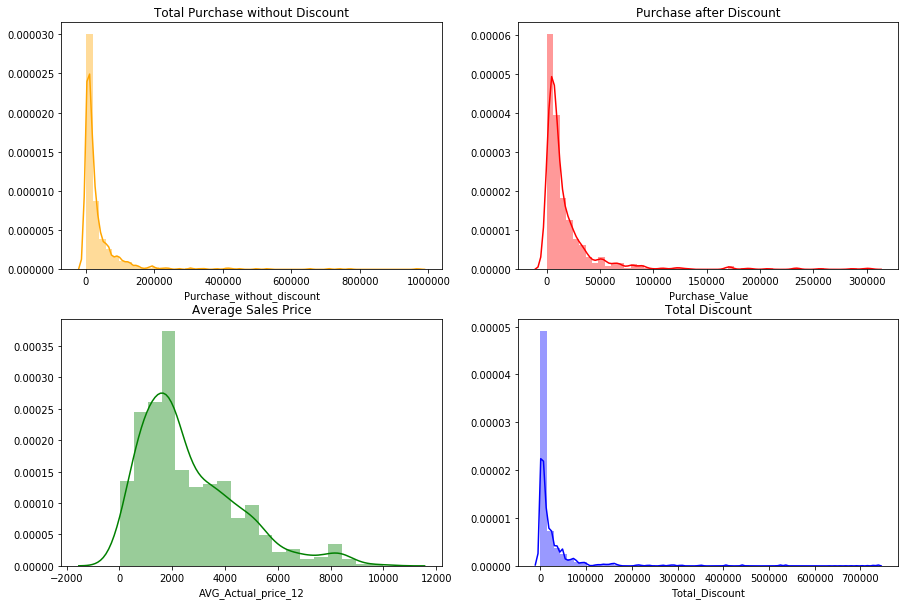

In [11]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.distplot(supermarket_raw_df['Purchase_without_discount'], color = 'orange')
plt.title('Total Purchase without Discount')

plt.subplot(2, 2, 2)
sns.distplot(supermarket_raw_df['Purchase_Value'], color = 'red')
plt.title('Purchase after Discount')

plt.subplot(2, 2, 3)
sns.distplot(supermarket_raw_df['AVG_Actual_price_12'], color = 'green')
plt.title('Average Sales Price')

plt.subplot(2, 2, 4)
sns.distplot(supermarket_raw_df['Total_Discount'],  color = 'blue')
plt.title('Total Discount')

Text(0.5, 1.0, 'Avg. Last Transaction Month Purchase ')

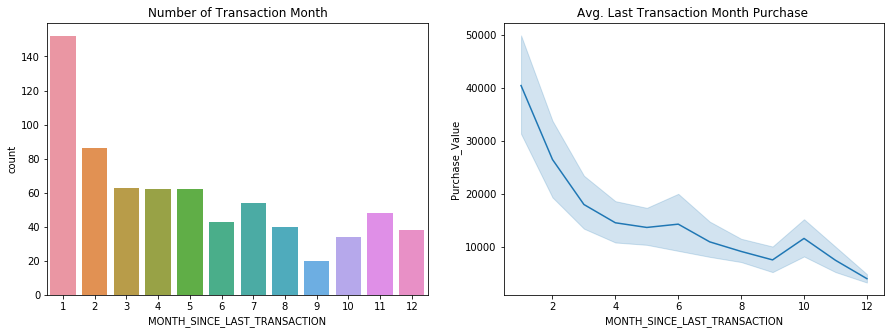

In [12]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='MONTH_SINCE_LAST_TRANSACTION', data=supermarket_raw_df)
plt.title("Number of Transaction Month")

plt.subplot(1, 2, 2)
sns.lineplot(x=supermarket_raw_df['MONTH_SINCE_LAST_TRANSACTION'], y=supermarket_raw_df['Purchase_Value'])
plt.title('Avg. Last Transaction Month Purchase ')

## Build the model

In [13]:
supermarket_raw_df.head()

Cust_id  AVG_Actual_price_12  Purchase_Value  No_of_Items  Total_Discount  \
0        1           300.000000         1200.00            4            0.00   
1        2          2563.282500        41012.52           16        78737.48   
2        4          3510.000000         7020.00            2          780.00   
3        8          4530.000000        13590.00            3         1510.00   
4        9          2428.076923        33455.00           15        17445.00   

   MONTH_SINCE_LAST_TRANSACTION  Purchase_without_discount  
0                            11                     1200.0  
1                             2                   119750.0  
2                             4                     7800.0  
3                             1                    15100.0  
4                             6                    50900.0

In [14]:
# Define X, Y

X =  supermarket_raw_df.drop(['Cust_id', 'Purchase_without_discount'], axis=1)

In [15]:
# Standarizing the features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

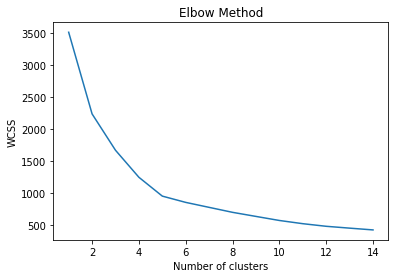

In [16]:
# Elbow Method to obtain K
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Pick K = 5 for building model

In [17]:
# Defining the k-means
km = KMeans(n_clusters=5, random_state=50)

# Fit model
%timeit km.fit(X_std)
labels_5 = km.predict(X_std)

36.2 ms ± 48.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Visualize model using PCA

In [18]:
# Use PCA to visualize the model
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(20,15))
colours = 'rbgkyc'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(labels_5[i]),
             color=colours[labels_5[i]],
             fontdict={'weight': 'bold', 'size': 150}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

From the above PCA graph, Kmeans clustering (k=5) seperates the high purchase level customers(labels 1, 3, right side). However, for low level, the datapoints are overlapped.

In [19]:
pca = PCA(n_components=2).fit(X_std)

pca.explained_variance_ratio_

array([0.55747935, 0.21662968])

## Evaluate clusters

In [20]:
from sklearn import datasets, metrics
from sklearn.metrics import silhouette_samples, silhouette_score
# The data has no ground truth
# Silhouette score is used to evaluate clusters.
labels = KMeans(n_clusters=5, random_state=50).fit_predict(X_std)
print(metrics.silhouette_score(X_std, labels, metric='euclidean'))

0.357185313649007


### Plot silhouette score with various clusters

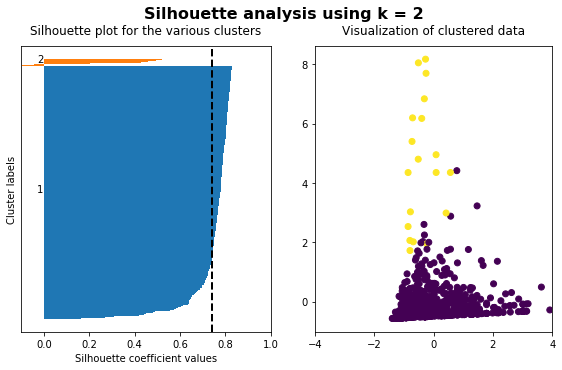

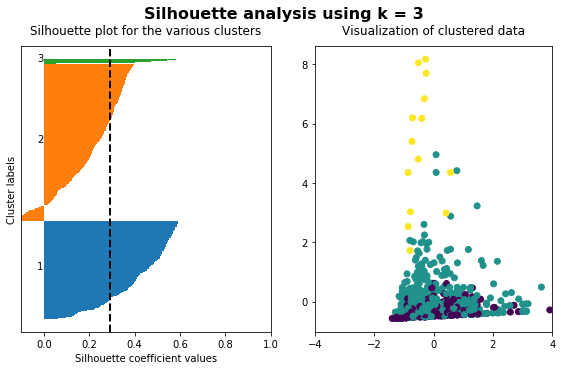

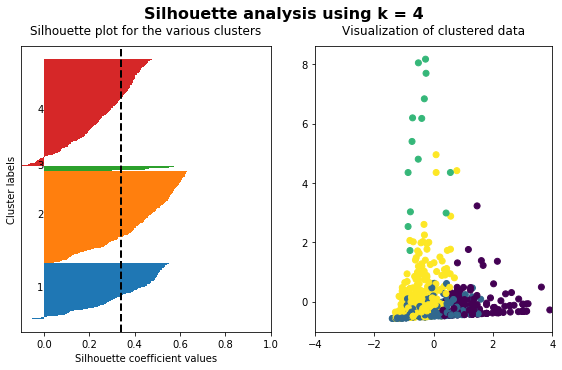

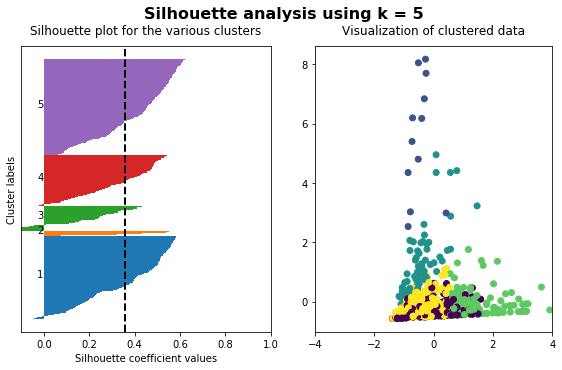

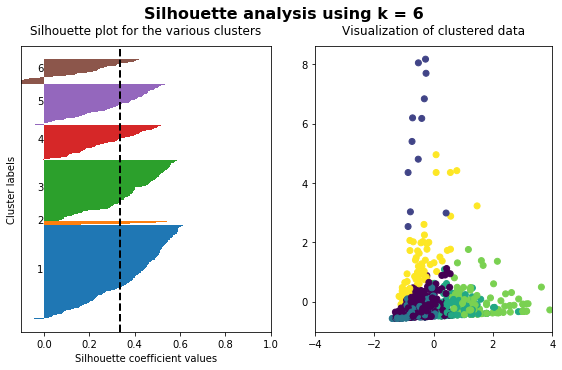

In [21]:
from sklearn.metrics import silhouette_samples, silhouette_score

for i, k in enumerate([2, 3, 4, 5, 6]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(8, 5)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_std)
   
    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='black')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
    
    ax2.set_xlim([-4, 4])
    ax2.set_xlim([-4, 4])
       
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.02)
    plt.show()

In [22]:
# Define a new column to take a look what each cluster represents(K=5 case).
supermarket_raw_df['Prediction']= labels_5
supermarket_raw_df.groupby("Prediction").mean()

Cust_id  AVG_Actual_price_12  Purchase_Value  No_of_Items  \
Prediction                                                                 
0           513.000000          5567.622481    16745.370438     3.613139   
1           505.558824          1840.631619    63748.339559    38.794118   
2           501.045872          2192.934683     7628.307615     3.922018   
3           432.500000          1736.197131   210805.710000   128.166667   
4           497.812734          1754.602778    11582.180375     7.490637   

            Total_Discount  MONTH_SINCE_LAST_TRANSACTION  \
Prediction                                                 
0              2588.459197                      3.598540   
1             76315.866324                      2.352941   
2              6238.562752                      9.472477   
3            368516.508333                      1.083333   
4             12388.692434                      2.996255   

            Purchase_without_discount  
Prediction                             
0                        19333.829635  
1                       140064.205882  
2                        13866.870367  
3                       579322.218333  
4                        23970.872809

As the above silhouette analysis plots show, n_clusters=2 has the best average silhouette score of around 0.74. The scores for n_clusters=3, 4, 5, 6 are about 0.295, 0.338, 0.357, 0.336, respectively. Silhouette scores decreased dramatically from 2 to 3 clusters, then a little bit bounced back to 5 clusters and again slightly dropped at 6 clusters. It seems clusters equal to 2 is the best choice for fitting model. The thickness of the silhouette plot gives an indication of how big each cluster is. However, it can be seen from the first figure that cluster 1 has huge samples compared with cluster 2. This indicates that 2 clusters could not really seperate the customers into different groups. The model might not have real application for marketing analysis.

The bottom line for silhouette score is: Good n_clusters will have a well above 0.5 silhouette average score as well as all of the clusters have higher than the average score. Hence, n_clusters=3, 4, 5, 6 cases, the silhouette average scores are less than 0.5. n_clusters=5 has average score about 0.35. Hence, the model seems not very good fitting and subgroups are overlapped as also seen in the "Visualization of clustered data" plots. 

Although K_means clustering could not group datapoints into distinct non-overlapping subgroups, it still can give you some idea ot the structure of the dataset. For example, K = 5, the score is 0.35. 

It can be clearly seen that there are 2 groups customers (cluster 1 and 3) who bought more items and spent more money in this supermarket.But these 2 groups have few people. They came to purchase probably due to high discount they have and not very often to visit the store. These two group can be named as "Discount_like group"

The group of n_cluster=0 might have strong purchase power. They buy most items at highest price and don't really care the item discount. The name of "Luxury_like group" is for them.

The group of n_cluster=2 is in the middle level according to purchase price, item no and discount. The group can be defined as "Affordable_Luxury_like group".

The group of n_cluster=4 also likes discount and low price items. They can be called as "Economical_like group".

Hence, the way of discount still is a good stratedy to attact more customers from Discount_like group and Economical_like group. The supermarket also needs to focus on provideing good quality and good brand items for Affordable_Luxury_like group customers and keep them to purchase items in the store because this group is the big size group.

For Luxury_like group, the store still needs to continue to provide top-line items and also provide very good service such as product maintainance.

In all, the k-means clustering provides good and explanatory information for this dataset.

## Dimension Reduction with t-SNE

In [23]:
import time
from sklearn.manifold import TSNE

X2 =  supermarket_raw_df.drop(['Cust_id','Purchase_without_discount','Prediction'], axis=1)
scaler = StandardScaler()
X2_std = scaler.fit_transform(X2)

# Fit model
km = KMeans(n_clusters=5, random_state=50)
km.fit(X2_std)
labels_t= km.predict(X2_std)

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X2_std)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 702 samples in 0.000s...
[t-SNE] Computed neighbors for 702 samples in 0.019s...
[t-SNE] Computed conditional probabilities for sample 702 / 702
[t-SNE] Mean sigma: 0.392660
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.459469
[t-SNE] KL divergence after 300 iterations: 0.546817
t-SNE done! Time elapsed: 1.6323342323303223 seconds


In [24]:
plt.figure(figsize=(10,5))
colours = 'rbgkyc'
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], str(labels_t[i]),
             color=colours[labels_t[i]],
             fontdict={'weight': 'bold', 'size': 150}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Compare t-SNE visualization with PCA (k=5 case), dimension reduction with t-SNE is clearly better than PCA with very less overlapping problem for seperating the datapoints into different groups. 

## Hierarchical clustering

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

X1 =  supermarket_raw_df.drop(['Cust_id','Purchase_without_discount','Prediction'], axis=1)

scaler = StandardScaler()
X1_std = scaler.fit_transform(X1)

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=5)

# Fit model
clusters_h = agg_cluster.fit_predict(X1_std)

In [26]:
# Use PCA to visualize the model
pca = PCA(n_components=2).fit_transform(X1_std)

plt.figure(figsize=(20,15))
colours = 'rbgkyc'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters_h[i]),
             color=colours[clusters_h[i]],
             fontdict={'weight': 'bold', 'size': 150}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [27]:
print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X1_std, clusters_h, metric='euclidean')))

The silhoutte score of the Agglomerative Clustering solution: 0.1550672767872346


## Density-based spatial clustering of applications with noise (DBSCAN)

In [28]:
from sklearn.cluster import DBSCAN

X1 =  supermarket_raw_df.drop(['Cust_id','Purchase_without_discount','Prediction'], axis=1)

scaler = StandardScaler()
X1_std = scaler.fit_transform(X1)

# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=0.5, min_samples=5, leaf_size=50)

# Fit model
clusters_d = dbscan_cluster.fit_predict(X1_std)

In [29]:
# Use PCA to visualize the model
pca = PCA(n_components=2).fit_transform(X1_std)

plt.figure(figsize=(20,15))
colours = 'rbgkyc'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters_d[i]),
             color=colours[clusters_d[i]],
             fontdict={'weight': 'bold', 'size': 150}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [30]:
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X1_std, clusters_d, metric='euclidean')))

The silhouette score of the DBSCAN solution: 0.3102024290741208


## Gaussian Mixture Models (GMM)

In [31]:
from sklearn.mixture import GaussianMixture

X1 =  supermarket_raw_df.drop(['Cust_id','Purchase_without_discount','Prediction'], axis=1)

scaler = StandardScaler()
X1_std = scaler.fit_transform(X1)

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=5, covariance_type='full',max_iter=150, random_state=50)

# Fit model
clusters_g = gmm_cluster.fit_predict(X1_std)

In [32]:
# Use PCA to visualize the model
pca = PCA(n_components=2).fit_transform(X1_std)

plt.figure(figsize=(20,15))
colours = 'rbgkyc'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters_g[i]),
             color=colours[clusters_g[i]],
             fontdict={'weight': 'bold', 'size': 150}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [33]:
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X1_std, clusters_g, metric='euclidean')))

The silhoutte score of the GMM solution: 0.07174958613833812


From both PCA visualization and silhoutte scores, the K-means (K=5 case) model has the highest scores. GMM has the lowest score of 0.072. Hence, K-means clustering is the best model for this data set.

## Conclusions

1. Through silhouette score evaluation, n_clusters=5 is the best cluster number, and the silhouette score is about 0.35 for k=5 case.
2. Although silhouette score is not very high, the k-means clustering model could provide basic and explanatory information for this data set.
3. K-means clustering is the best model for this dataset compared with Hierarchical, DBSCAN and GMM based on silhouette scores.
4. t-SNE has better visualization than PCA.